# Actividad

- **Nombre**: Juan Pablo Treviño Lozano
- **Matrícula**: A01197363

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


# Highway MPG dataset

Este dataset contiene variables medidas por la agencia de protección ambiental de 38 modelos de vehículo diferentes de 1999 a 2008. Las variables que se registraron fueron:

* **manufacturer**: nombre del fabricante.
* **model**: nombre del modelo.
* **displ**: desplacamiento del motor, en litros.
* **year**: año de fabricación.
* **cyl**: número de cilindros.
* **trans**: tipo de transmisión.
* **drv**: tipo de tracción, f-delantera, r-trasera, 4- 4 llantas
* **cty**: rendimiento del motor en ciudad, en millas por galón.
* **hwy**: rendimiento del motor en carretera, en millas por galón.
* **fl**: tipo de combustible.
* **class**: tipo de vehículo.

In [3]:
# Carga las librerías y datosimport numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
autos_df = pd.read_csv('data/auto-mpg.csv')



Text(0.5, 1.0, 'Fabricantes')

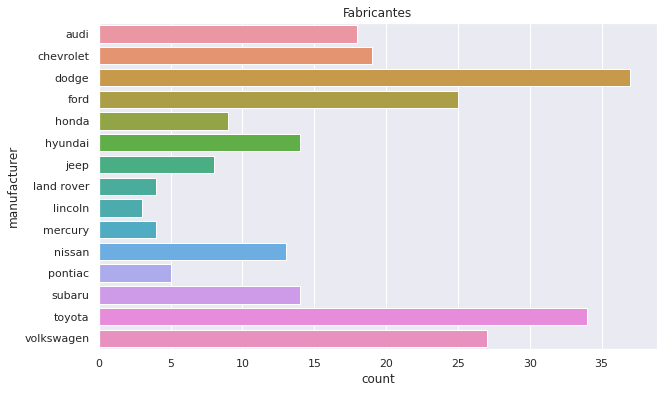

In [4]:
# ¿Cuántas observaciones hay de cada fabricante? Muéstralo en un gráfico.
fig = plt.figure(figsize=(10, 6))
sns.countplot(data=autos_df, y='manufacturer')
plt.title('Fabricantes')

Text(0.5, 1.0, 'Comparación de rendimiento del motor en carretera')

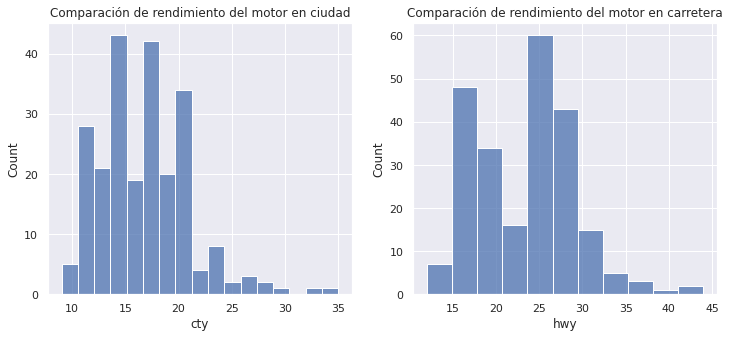

In [6]:
# Haz un histograma de las variables numéricas cty, hwy y haz una comparación en un gráfico lado a lado

fig, axs = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(data=autos_df, x='cty', ax=axs[0])
axs[0].set_title('Comparación de rendimiento del motor en ciudad')

sns.histplot(data = autos_df, x='hwy', ax=axs[1])
axs[1].set_title('Comparación de rendimiento del motor en carretera')

Text(0.5, 0, 'cyl')

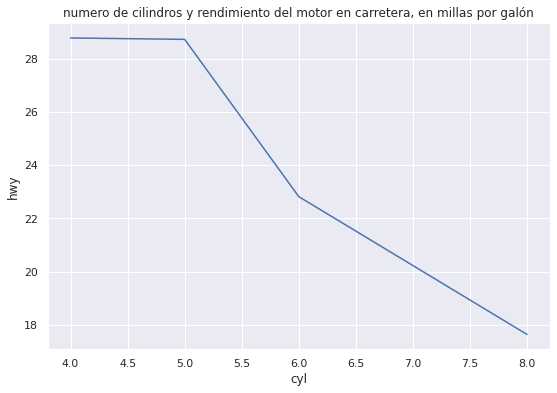

In [ ]:
# ¿Cómo se comparar el rendimiento en carretera (hwy) contra el número de cilindros? 
# Haz un gráfico que represente esta relación.
fig = plt.figure(figsize=(9,6))
plt.plot(autos_df.groupby('cyl').mean()['hwy'])
plt.title('numero de cilindros y rendimiento del motor en carretera, en millas por galón')
plt.ylabel('hwy')
plt.xlabel('cyl')



Text(0.5, 1.0, 'numero de cilindros y rendimiento del motor en carretera, en millas por galón')

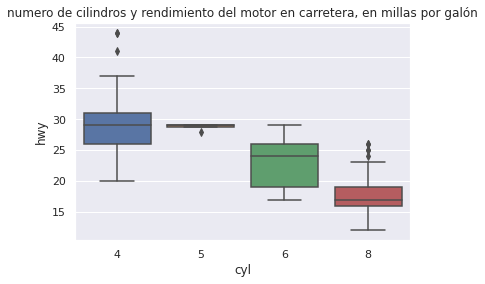

In [7]:
# cyl es una variable numérica, pero como tiene pocos valores podemos tomarla como si fuera categórica.
# ¿De qué otra forma se puede representar la relación de la pregunta anterior?

sns.boxplot(data=autos_df, y='hwy', x='cyl')
plt.title('numero de cilindros y rendimiento del motor en carretera, en millas por galón')

Text(0.5, 1.0, 'Relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad')

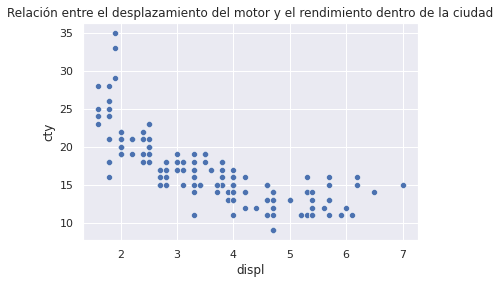

In [8]:
# Cuál es la relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad?

sns.scatterplot(data=autos_df, x='displ', y='cty')
plt.title('Relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad')

          displ       cyl       cty       hwy
displ  1.000000  0.930227 -0.798524 -0.766020
cyl    0.930227  1.000000 -0.805771 -0.761912
cty   -0.798524 -0.805771  1.000000  0.955916
hwy   -0.766020 -0.761912  0.955916  1.000000


Text(0.5, 1.0, 'Correlación entre variables numéricas')

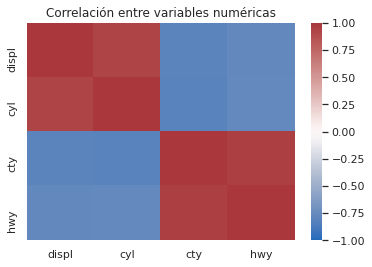

In [11]:
# ¿Cómo se correlacionan las variables numéricas? Muestra esta correlación en un gráfico. (No tomar en cuenta el año como
# variable numérica)

# Sugerencia: usa la paleta de colores 'vlag' o una paleta DIVERGENTE

matriz_corr = autos_df.drop('year', axis=1).corr()
print(matriz_corr)

sns.heatmap(data=matriz_corr, vmin=-1, vmax=1, cmap='vlag')
plt.title('Correlación entre variables numéricas')

In [ ]:
# ¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?

Fuerte relación positiva: cty-hwy cyl-displ
Fuerte relación negativa: displ-cty displ-hwy cyl-cty cyl-hwy

SyntaxError: ignored

manufacturer  year
audi          1999    17.111111
              2008    18.111111
chevrolet     1999    15.142857
              2008    14.916667
dodge         1999    13.375000
              2008    12.952381
ford          1999    13.933333
              2008    14.100000
honda         1999    24.800000
              2008    24.000000
hyundai       1999    18.333333
              2008    18.875000
jeep          1999    14.500000
              2008    13.166667
land rover    1999    11.000000
              2008    12.000000
lincoln       1999    11.000000
              2008    12.000000
mercury       1999    13.500000
              2008    13.000000
nissan        1999    17.666667
              2008    18.428571
pontiac       1999    17.000000
              2008    17.000000
subaru        1999    19.000000
              2008    19.500000
toyota        1999    18.150000
              2008    19.071429
volkswagen    1999    21.250000
              2008    20.454545
Name: cty, dtype: flo

Text(0.5, 1.0, 'Rendimiento en la ciudad por cada fabricante por año')

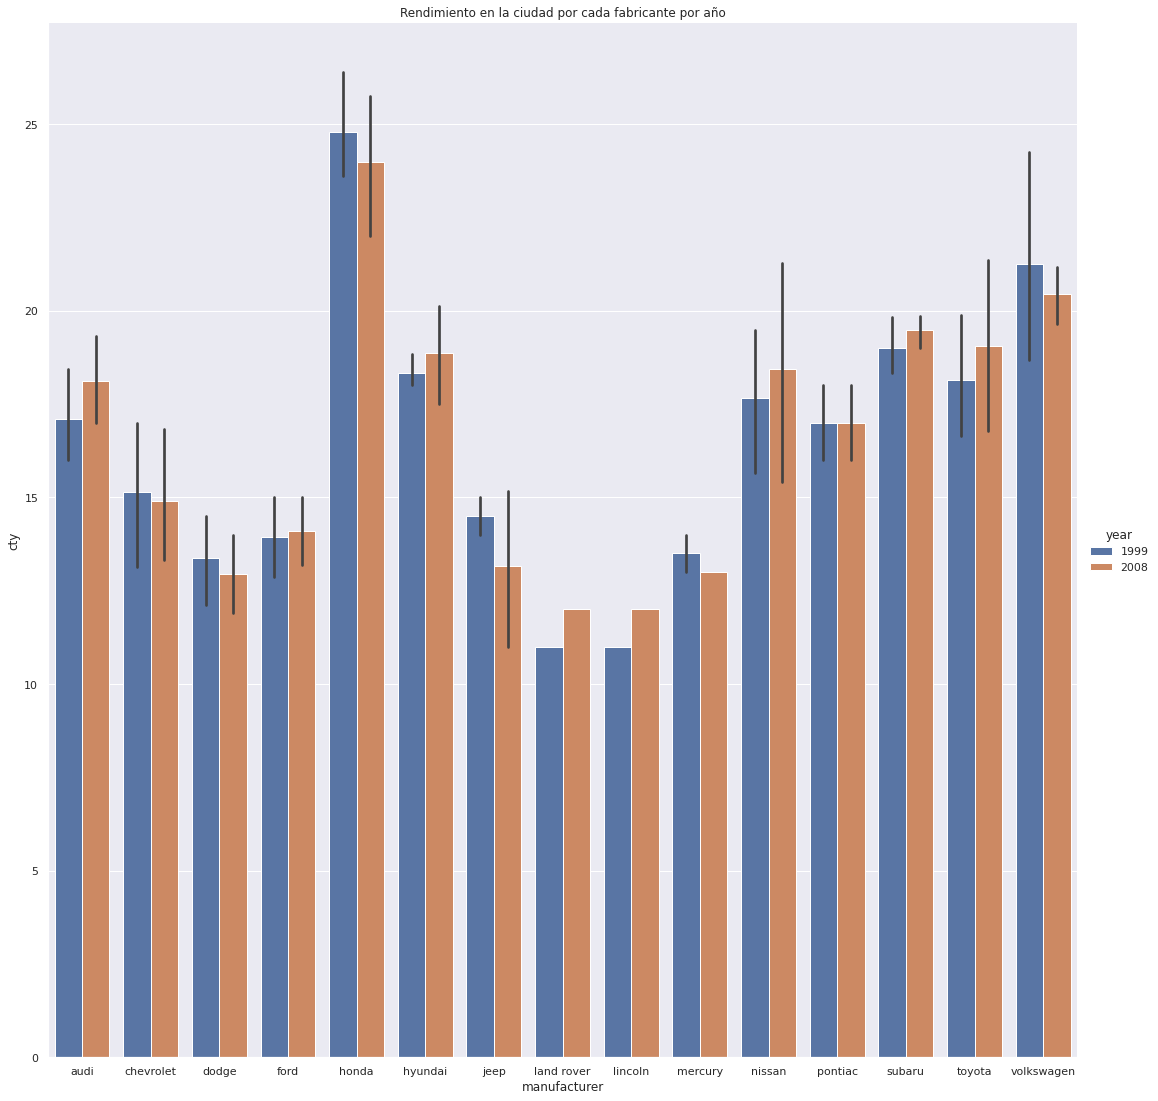

In [12]:
# ¿Los fabricantes mejoran el rendimiento en ciudad conforme pasa el tiempo? Haz una tabla resumen por año y por marca del
# rendimiento promedio y grafica los resultados.

a=autos_df.groupby(['manufacturer', 'year']).mean()['cty']
print(a)


sns.catplot(data=autos_df, kind="bar",x="manufacturer", y="cty", hue="year", height=15)
plt.title('Rendimiento en la ciudad por cada fabricante por año')
